-------------------
### RTML lab report 
#### Name = ati tesakulsiri  st123009
#### Lab 05 Mark R-CNN
---------------------

Mask R-CNN is a Convolutional Neural Network (CNN) and state-of-the-art in terms of image segmentation. This variant of a Deep Neural Network detects objects in an image and generates a high-quality segmentation mask for each instance.

For each intance of an object in an image, Mask R-CNN attempts to generate
 - A bounding box
 - Class scores
 - A segmentation mask

The backbone and neck of Mask R-CNN are based on
 - A feature pyramid network (FPN)
 - ResNet

### Feature Pyramid Networks

We've seen the idea of the feature pyramid network (FPN) in YOLOv3 and YOLOv4. It is a feature extractor using a pyramid concept.
We begin with ordinary progressive downsampling of the input to get a multiscale representation of the input, but rather
than using that "low-level" multiscale representation directly, we progressively upsample the coarse representation of
the input using input from the low-level feature maps. The idea is shown in the left-hand panel of the diagram above.
By incorporating information from both the low-level "bottom-up" fine grained feature map and the upsampled coarser grained feature
map in the pyramid, the fine grained representation at the bottom of the pyramid contains much more useful or more "semantic"
information about the input.


### ResNet backbone

The bottom-up part of the FPN used in Mask-RCNN is ResNet. It is used similar to how
Darknet-53 is used in YOLO. We take the classifier structure as the bottom-up half (left side) of
the pyramid, then we add the top-down part (right side) to obtain the FPN.

Mask R-CNN taps into ResNet in 4 or 5 places according to the implementation, at the ouptut of various residual blocks.

### Region Proposal Network (RPN)

The Faster R-CNN RPN connects to the top of the FPN pyramid. It performs classification and bounding box regression for each possible proposal.

<!-- <img src="img/RPN.png" title="RPN" style="width: 600px;" /> -->

### Detection network

The detection network uses the results of the RPN as well as the output of the FPN. With the RPN bounding box as input, we assign the box to one of the levels of the pyramid.
Specifically, we use

$$ k = \left\lfloor k_0 +\log_2\left( \frac{\sqrt{wh}}{224} \right) \right\rfloor $$

Then the ROIAlign block interpolates the appropriate set of features from the best level (level $k$) of the pyramid. The region is aligned and scaled to a size of
56$\times$56, and the resulting representation is forwarded to the mask prediction head.

### Mask Head

The mask head is a FCN that up-samples from the detection result, and the patch size is finally re-scaled back to the input size.

### U-Net: Convolutional Networks for Biomedical Image Segmentation
The u-net is convolutional network architecture for fast and precise segmentation of images. Up to now it has outperformed the prior best method (a sliding-window convolutional network) on the ISBI challenge for segmentation of neuronal structures in electron microscopic stacks. It has won the Grand Challenge for Computer-Automated Detection of Caries in Bitewing Radiography at ISBI 2015, and it has won the Cell Tracking Challenge at ISBI 2015 on the two most challenging transmitted light microscopy categories (Phase contrast and DIC microscopy) by a large margin

--------------------
## 2. Methodology

 1. Evaluate the pretrained COCO model on the COCO validation set we used last week.
 2. Download the Cityscapes dataset and run Mask R-CNN on it in inference model. 
 3. Fine tune the COCO Mask R-CNN on Cityscapes and report the results. 
 4. Try U-NET and compare with Mask R-CNN


## 3. Result
- the python project for COCO training with COCO and some example result from traning and evaluatiung
``` bash
.
├── ba_result.py
├── cityscaoe.py
├── demo.ipynb
├── eval.ipynb
├── evalute.py
├── image
│   └── 001.png
├── LICENSE
├── maskrcnn_coco-201.pth
├── maskrcnn_coco-202.pth
├── maskrcnn_coco-203.pth
├── maskrcnn_coco-204.pth
├── maskrcnn_coco-205.pth
├── maskrcnn_coco-206.pth
├── maskrcnn_coco-207.pth
├── maskrcnn_coco-208.pth
├── maskrcnn_coco-209.pth
├── maskrcnn_coco-210.pth
├── maskrcnn_results.pth
├── pytorch_mask_rcnn
│   ├── datasets
│   │   ├── city_turbodset.py
│   │   ├── coco_dataset.py
│   │   ├── coco_eval.py
│   │   ├── generalized_dataset.py
│   │   ├── __init__.py
│   │   ├── __pycache__
│   │   │   ├── coco_dataset.cpython-38.pyc
│   │   │   ├── coco_eval.cpython-38.pyc
│   │   │   ├── generalized_dataset.cpython-38.pyc
│   │   │   ├── __init__.cpython-38.pyc
│   │   │   ├── utils.cpython-38.pyc
│   │   │   └── voc_dataset.cpython-38.pyc
│   │   ├── utils.py
│   │   └── voc_dataset.py
│   ├── engine.py
│   ├── gpu_info.json
│   ├── gpu.py
│   ├── __init__.py
│   ├── model
│   │   ├── box_ops.py
│   │   ├── __init__.py
│   │   ├── mask_rcnn.py
│   │   ├── pooler.py
│   │   ├── __pycache__
│   │   │   ├── box_ops.cpython-38.pyc
│   │   │   ├── __init__.cpython-38.pyc
│   │   │   ├── mask_rcnn.cpython-38.pyc
│   │   │   ├── pooler.cpython-38.pyc
│   │   │   ├── roi_heads.cpython-38.pyc
│   │   │   ├── rpn.cpython-38.pyc
│   │   │   ├── transform.cpython-38.pyc
│   │   │   └── utils.cpython-38.pyc
│   │   ├── roi_heads.py
│   │   ├── rpn.py
│   │   ├── transform.py
│   │   └── utils.py
│   ├── __pycache__
│   │   ├── engine.cpython-38.pyc
│   │   ├── gpu.cpython-38.pyc
│   │   ├── __init__.cpython-38.pyc
│   │   ├── utils.cpython-38.pyc
│   │   └── visualizer.cpython-38.pyc
│   ├── utils.py
│   └── visualizer.py
├── README.md
├── trainer_pkm.sh
└── train.py
```

> and here is some result from traning
``` bash
472800   0.148  0.028   0.182   0.068   0.261
472900   0.063  0.098   0.067   0.035   0.308

...

Evaluate annotation type *bbox*
DONE (t=30.14s).
Accumulating evaluation results...
DONE (t=4.19s).
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=31.85s).
Accumulating evaluation results...
DONE (t=4.24s).
accumulate: 70.7s
training: 389.9 s, evaluation: 681.0 s
{'bbox AP': 20.5, 'mask AP': 16.2}

total time of this training: 2165.4 s
already trained: 5 epochs
```

> And here is the result from `evaluating`
``` bash
root@0746646b7288:~/keep_lab/RTML_Labsession/05_MARKRCNN/pyProj# python3 evalute.py 
...

device: cuda:2
loading annotations into memory...
Done (t=0.85s)
creating index...
index created!
Namespace(ckpt_path='/root/keep_lab/RTML_Labsession/05_MARKRCNN/pyProj/maskrcnn_coco-210.pth', data_dir='/root/Datasets/coco', dataset='coco', device_num='2', iters=3, results='/root/keep_lab/RTML_Labsession/05_MARKRCNN/pyProj/maskrcnn_results.pth', use_cuda=True)

evaluating...

...

DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.10s).
accumulate: 0.3s
{'bbox AP': 23.5, 'mask AP': 15.6}

Total time of this evaluation: 5.9 s, speed: 3.3 imgs/s
```

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

### 3.2 Download the Cityscapes dataset and run Mask R-CNN on it in inference model. 

```
root@0746646b7288:~/Datasets/Cityscapes# ls
annotations  checked_train2017.txt  checked_train.txt  checked_val2017.txt  checked_val.txt  gtCoarse  gtFine  leftImg8bit  leftImg8bit_trainextra.zip  license.txt  README
root@0746646b7288:~/Datasets/Cityscapes# 
```

### 3.3 Fine tune the COCO Mask R-CNN on Cityscapes and report the results. 

## 3.4 Compare with U-Net

> here are the example of training 
```bash
epoch = 0 | loss = 1.2612663507461548
epoch = 0 | loss = 1.1710327863693237
epoch = 0 | loss = 1.1344455480575562
epoch = 0 | loss = 1.0398420095443726
epoch = 0 | loss = 0.9778011441230774
epoch = 0 | loss = 0.9564194679260254
epoch = 0 | loss = 1.0183545351028442
epoch = 0 | loss = 0.9336801767349243
epoch = 0 | loss = 0.8689411282539368
```

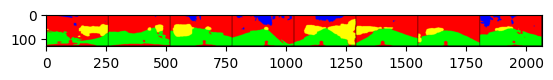

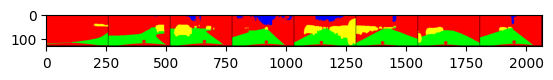

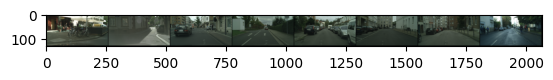

In [3]:
plt.imshow(mpimg.imread('imgsent/gen_image_2_366.png'))
plt.show()
plt.imshow(mpimg.imread('imgsent/label_image_2_366.png'))
plt.show()
plt.imshow(mpimg.imread('imgsent/original_image_2_366.png'))
plt.show()